In [1]:
!pip install dipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.6 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Daniel Bandala @ mar-2023
# dti-model output cleaning script
# general libraries
import os, glob
import matplotlib.pyplot as plt
# diffussion image processing
from dipy.io.image import load_nifti, save_nifti
from dipy.segment.mask import median_otsu

In [3]:
# folders dataset
main_dir = '/content/drive/MyDrive/dti-transformer/dti_data/HCP'

In [110]:
case_folder = main_dir+'/case_04'

In [111]:
 # read difussion data
data, affine = load_nifti(case_folder+'/input/DWI_opt.nii.gz')

In [112]:
maskData,mask = median_otsu(data, vol_idx=range(1,15),median_radius=4,numpass=8,dilate=2) #median_radius=2, numpass=1

In [117]:
# read output data
out_data, out_affine = load_nifti(case_folder+'/dti/DTI_MD.nii.gz')
# apply mask to output
clean_output = out_data*mask
res = out_data - clean_output

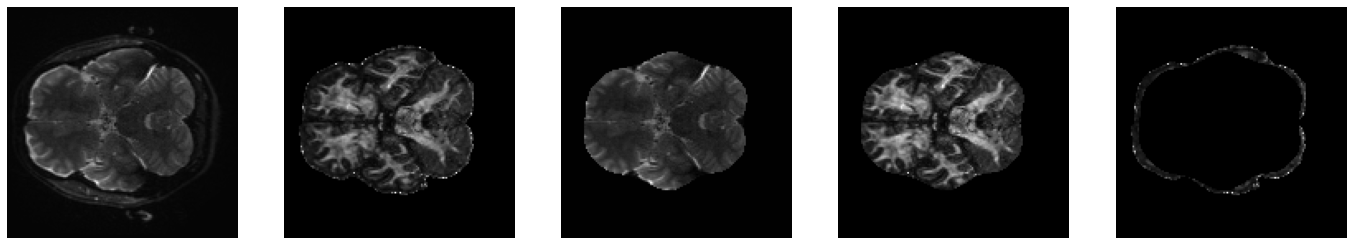

In [114]:
s = 30
plt.figure(figsize=(24,16))
plt.subplot(1, 5, 1).set_axis_off()
plt.imshow(data[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 2).set_axis_off()
plt.imshow(out_data[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 3).set_axis_off()
plt.imshow(maskData[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 4).set_axis_off()
plt.imshow(clean_output[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 5).set_axis_off()
plt.imshow(res[:, :, s], cmap='gray', origin='lower')

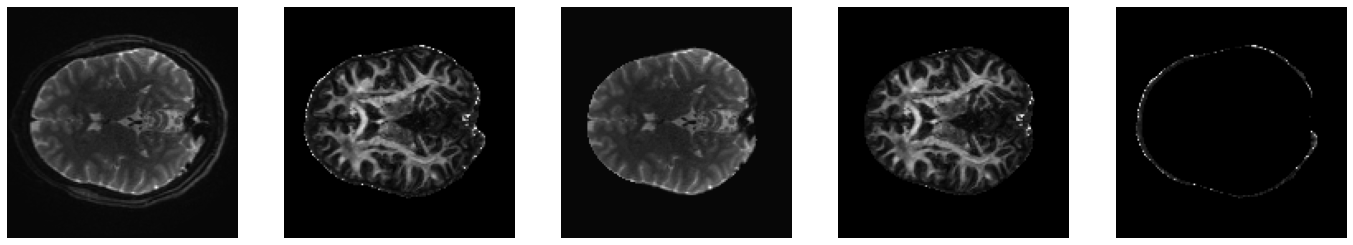

In [115]:
s = 48
plt.figure(figsize=(24,16))
plt.subplot(1, 5, 1).set_axis_off()
plt.imshow(data[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 2).set_axis_off()
plt.imshow(out_data[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 3).set_axis_off()
plt.imshow(maskData[:, :, s, 0], cmap='gray', origin='lower')
plt.subplot(1, 5, 4).set_axis_off()
plt.imshow(clean_output[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 5, 5).set_axis_off()
plt.imshow(res[:, :, s], cmap='gray', origin='lower')

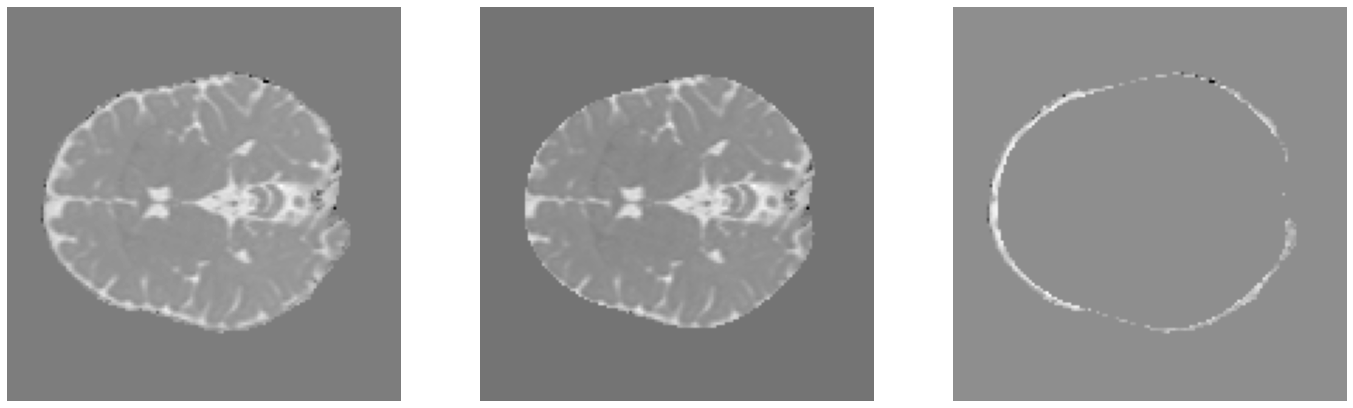

In [126]:
s = 48
plt.figure(figsize=(24,16))
plt.subplot(1, 3, 1).set_axis_off()
plt.imshow(out_data[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 3, 2).set_axis_off()
plt.imshow(clean_output[:, :, s], cmap='gray', origin='lower')
plt.subplot(1, 3, 3).set_axis_off()
plt.imshow(res[:, :, s], cmap='gray', origin='lower')
plt.savefig("outliers_remove.png")

In [ ]:
# get cases list
path_list = glob.glob(os.path.join(main_dir,'case_*'))
# for each case extract optimum directions
for path in path_list:
    # print case
    print("Processing ", os.path.basename(path))
    #input path
    input = os.path.join(path,'input')
    #output path
    output = os.path.join(path,'dti')
    #target path
    target = os.path.join(path,'output')

    # read difussion data
    data, affine = load_nifti(os.path.join(input,'DWI_opt.nii.gz'))
    # generate brain mask
    maskData,mask = median_otsu(data, vol_idx=range(1,15),median_radius=4,numpass=8,dilate=2)

    # create folder if it does not exist
    if not os.path.exists(target):
        os.makedirs(target)

    # clean outliers in all maps
    for map in ["FA","MD","MO"]:
        # read output data
        out_data, out_affine = load_nifti(os.path.join(output,'DTI_'+map+'.nii.gz'))
        # apply mask to output images
        clean_output = out_data*mask
        # save file
        save_nifti(os.path.join(target,'DTI_'+map+'.nii.gz'), clean_output, out_affine)

Processing  case_27
Processing  case_20
Processing  case_23
Processing  case_25
Processing  case_10
